# Project 2: Photon-matter interaction - Monte Carlo simulation og X-ray imaging

In this project we will simulate X_rays through different materials. X-rays are electromagnetic waves with energies between 0.1 keV to 100keV. X-rays are among other things used in medical imaging where images are formed due to differences in attenuation between materials. The downside of using X-rays on humans is that there are health risks associated with the human body absorbing energy from the X-rays. In this project we will simulate X-rays by simulating 1D photon propagation and attenuation in matter by using Monte-Carlo methods. The Monte-Carlo method used here is based on genereating random numbers, and therefore all the results will be dependent on coincidences. By using these kinds of simulations, we will study X-ray imaging. From here we will discuss and analyse the optimal dose based on the contrast. Futhermore, the simulations will also be used to image unknown objects based on 3D matrixes with varying attenuation coeffisients. 


Starting with importing libraries we need in order to make calculations and plot results

In [1]:
# Numpy to make life easy
import numpy as np

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Increase default font size
plt.rcParams.update({'font.size': 14})

# Import for progress meter
from tqdm import tqdm, trange


## Problem 1##
In this problem we will simualte the attenuation of photons by using Monte Carlo methods. Here it will be a 1D simulation, meaning that the propagation will be in one dimention. The path the photons take is separated into $n$ discrete steps, where each step has the stepsize $\Delta x$. At each step we generate a random number to determine if the photon is absorbed or not. This is the Monte Carlo method. 

Here we define the functions that calculates how many photos that are scattered in the material and how many photons that reach the detector. These functions uses the Monte Carlo methods. The calculation of the probability, $p$, that a photon is scattered is based on Eq. (2) in the project description.

The analytic value of the intensity is calculated from Eq. (4) in the project description.

In [2]:
# This function calculates if one photon survives through the material, survives here means that it reaches the detector.
# The function takes in n_step, which is the number of steps we split the path thorugh the material in,
# mu_lst which is a list containing the mu values for each step
# and delta_x which is the step length.
# The function returns True if the photon survived through the material and False if the photon was scattered
# last_step is also returned which is it the step the photon was scattered at if it does not survive. 
# If the photon survived this value equals n step.
# The calculation is done by first setting the last_step value to zero.
# Then the survive variable is set to true. This value will continue to be true if the photon survives a step, 
# if the photon is scattered during a step in the material the survive value will be set to false. 
# Then a list z with n_step random numbers between 0 and 1 is simulated.
# Then we have a while loop that iterates through all the steps in the material. 
# The loop will be broken off when a photon is scattered.
# For each step the probability is calculated for the current mu value. 
# If the corresponding z value is less than or equal to p the phtoton will be scattered during this step. 
# Which means that the survive value will be set to false and the loop will break off. 
# If the photon survive a step the last_step value is updated

def is_photon_surviving(n_step, mu_lst, delta_x):
    last_step = 1 
    survive = True 
    z = np.random.rand(n_step)
    
    while (survive!= False and last_step<n_step):
        p = mu_lst[last_step]*delta_x
        
        if z[last_step] <= p:
            survive= False
        else:
            last_step+=1
        
    return survive, last_step



# This function simulates X-rays by sending several photons through a material.
# It takes in N_0 which is the number of photons that is sent in to the material,
# n_step, which is the number of steps we split the path through the material in, 
# mu_lst which is a list containing the mu values for each step
# and t which is the length of the material.
# The function then calculates how many photons that survive each step by using is_photon_surviving.
# It then returns a list which contains how many photons we have at end of each step. 
# The first thing the function does is to check if mu_lst is a float or a int value. If it is mu is turned into a list. 
# We have this check because during this project we sometimes have mu as a value and sometimes as a list. This 
# adjustment is a part of Problem 2: task 2.
# Then delta_x, which is the step length, is defined.
# Then surviving_lst is made, which is a list of length n_step where each element has the value N_0.
# Then there is a for-loop which calculates whether each photon survives all the steps. 
# The loop iterates through all the photons. 
# For each photon the is_photon_surviving function is called. 
# If the photon did not survive all the steps, we subtract 1 photon from all the elements in surviving_lst 
# from where the photon was scattered to the end of list.
# If the photon survives all the way through the material nothing happens.
# This loop will result in a surviving_lst which contains how many photons have survived each step. 
# Then the surviving_lst is returned.

def photons_survived_simulation(N_0, n_step, mu_lst, t):
    
    # This if sentence 
    if (isinstance(mu_lst,float) or isinstance(mu_lst,int)):
        mu_lst=np.ones(n_step)*mu_lst
        
    delta_x=t/(n_step-1)
    
    surviving_lst = np.ones(n_step)*int(N_0)
    
    for i in range (int(N_0)):
        is_surviving, photon_last_step = is_photon_surviving(n_step, mu_lst, delta_x)
        
        if (is_surviving == False):
            surviving_lst[photon_last_step:] -= 1
            
    return surviving_lst



# This function makes a x_list from 0 to t whith n_step elements.
# x here represents the direction the photons propagate in.

def x_lst_func(t, n_step):
    x_lst=np.linspace(0,t,n_step)
    return x_lst



# I_analytic calculates the analytic intensity value for each x_value.
# It takes in a mu value and x_lst.
# Then calculates the I value for each step by using Eq. (4) in the project description. 
# Then the I list is returned. 

def I_analytic(mu, x_lst):
    I_lst=np.zeros(len(x_lst))
    for i in range(len(x_lst)):
        I_lst[i] = (np.exp(-mu*x_lst[i]))
    return I_lst



### Problem 1: task 1### 

In this task we look at the propagation of one photon through a material. We are interested in whether the photon reaches the detectot or is scattered somewhere in the material. 

In [3]:
# Here constants for this task is defined. n_step we have set ourselfs, but t,mu and therefor delta x 
# where given in the project description for this task. 
n_step_2a= 1000
t_2a = 10                           #[cm]
mu_lst_2a= np.ones(n_step_2a)*0.1   #[cm^-1]
delta_x_2a = t_2a/n_step_2a         #[cm]


# Here we have a call to is_photon_surviving which is the function that calculates if a photon reaches the detector or not.
is_surviving_2a, photon_last_step_2a = is_photon_surviving(n_step_2a, mu_lst_2a, delta_x_2a)


# This prints the result
if is_surviving_2a==True:
    print(f"The photon reached the detector.")
else:
    print(f"The photon did not reach the detector, it was scattered in the material.")
    

The photon did not reach the detector, it was scattered in the material.


### Problem 1: task 2###
If we run the calculation in task 1 several times we see that the photon does not always reach the end of the material when $t=10$ cm and $\mu = 0.1 cm^{-1}$. Based on the intensity curve in Fig.(2) in the project description, we expect the photon to reach the end of the material approximately 30-40% of the cases.

### Problem 1: task 3###
When we choose the step size we have to make sure that $p=\mu \Delta x$ always is less than 1. If $p$ becomes 1 or higher, all the photons will be scattered in the material and therefore we will not detect anything. We can avoid this problem by decreasing the stepsize $\Delta x$.

### Problem 1: task 4###
In this task we simulate the path of several photons $N_0$ through a material. For each discrete step of the path we will record the number of photons that are not absorbed. After the simulation we will plot the intensity as a function of $x$, which here is the direction og propagation. The intensity is found, for a given energy, by the equation $I(x)= N(x)E$ which was given in the project description. We will vary different input parameters to see how they effect the result. 

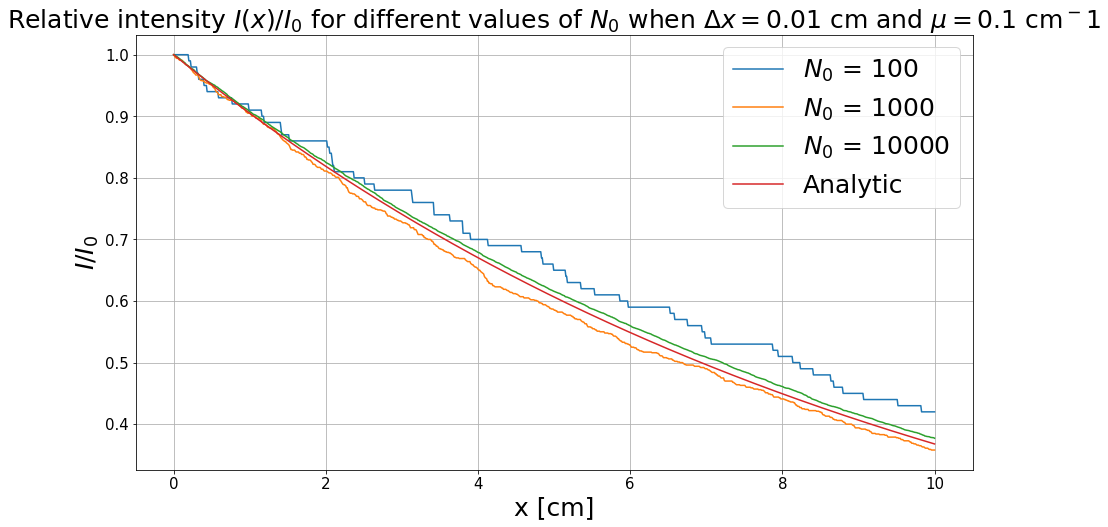

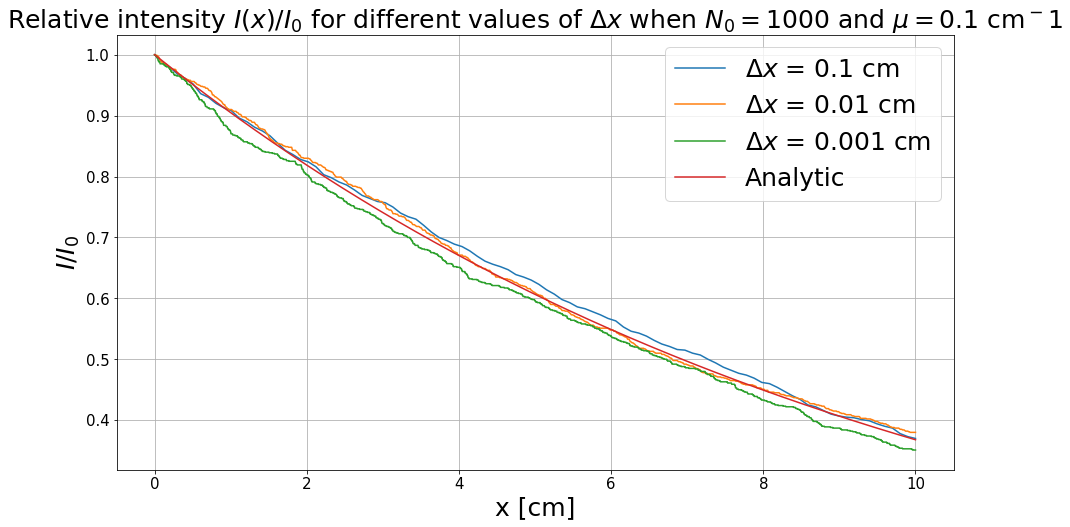

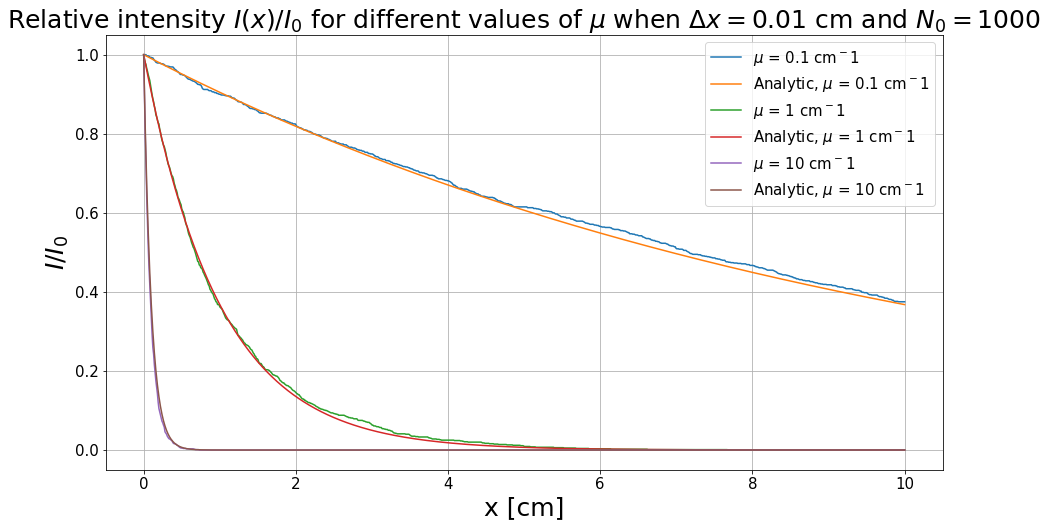

In [4]:
#Here we define constants for this problem. t, the material thickness where given in the project description
t= 10   # [cm]

# The static values are uesd when we look at how the result changes with one of the other variables. 
# The lists are the different values where we look at how the variation effects the result.
# n_step is the number of steps we divide the path through the material in. 
# N_0 is the number of photons we send into the material. 
# mu is the attenuation coeffisients.
n_step_static=1000
n_step_dynamic_lst=[100, 1000, 10000]

N_0_static = 1000
N_0_dynamic_lst=[100, 1000, 10000]

mu_static = 0.1                  #[cm^-1]
mu_dynamic_lst = [0.1, 1, 10]    #[cm^-1]

# Here we call on the necesary functions to plot the analytic I values. 
x_a_lst = x_lst_func(t, n_step_static)
I_analytic_lst = I_analytic(mu_static, x_a_lst)


# Here we make a figure and set the figur size
plt.figure(1, figsize = [15,8])
# Here we set the title of the plot
plt.title(fr"Relative intensity $I(x)/I_{0}$ for different values of $N_0$ when $\Delta x ={t/n_step_static}$ cm and $\mu = {mu_static}$ cm$^{-1}$", fontsize=25)

# This for loop iterates through all the elements in the N_0_dynamic_lst list.
# For each N_0 we simulate the x_rays through the material with photon_survived_simulation
# Then we calculate the relative intensity and then plot the intensity as a function of x.
for N_0 in N_0_dynamic_lst:
    survived_lst = photons_survived_simulation(N_0, n_step_static, mu_static, t)
    I_calculated_lst = survived_lst/N_0
    plt.plot(x_a_lst, I_calculated_lst, label = f"$N_0$ = {N_0}")
    
# Here the relative analytic intensity is plotted as a function of x. 
plt.plot(x_a_lst, I_analytic_lst, label = "Analytic")

# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel('$I/I_0$', fontsize=25)
plt.xlabel('x [cm]', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop = {'size':25})
plt.grid()
plt.show()


# Here we make a figure and set the figur size
plt.figure(2, figsize = [15,8])
# Here we set the title of the plot
plt.title(fr"Relative intensity $I(x)/I_{0}$ for different values of $\Delta x$ when $N_0={N_0_static}$ and $\mu = {mu_static}$ cm$^{-1}$", fontsize=25)

# This for loop iterates through all the elements in the n_step_dynamic_lst list.
# For each element, n_step, in the n_step_dynamic_lst list, a list of x_values is made 
# Then the x_rays through the material are simulated with photon_survived_simulation
# Then the relative intensity is calculated and then plotted as a function of x.
for n_step in n_step_dynamic_lst:
    x_lst = x_lst_func(t, n_step)
    survived_lst = photons_survived_simulation(N_0_static, n_step, mu_static, t)
    I_calculated_lst = survived_lst/N_0_static
    plt.plot(x_lst, I_calculated_lst, label = f"$\Delta x$ = {t/n_step} cm")

# Here the relative analytic intensity is plotted as a function of x. 
plt.plot(x_a_lst, I_analytic_lst, label = "Analytic")

# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel('$I/I_0$', fontsize=25)
plt.xlabel('x [cm]', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop = {'size':25})
plt.grid()
plt.show()


# Here we make a figure and set the figur size
plt.figure(3, figsize = [15,8])

# Here we set the title of the plot
plt.title(fr"Relative intensity $I(x)/I_{0}$ for different values of $\mu$ when $\Delta x ={t/n_step_static}$ cm and $N_0={N_0_static}$", fontsize=25)

# This for loop iterates through all the elements in the mu_dynamic_lst list.
# For each mu in the mu_dynamic_lst list, the x_rays through the material are simulated with photon_survived_simulation.
# Then the relative intensity is calculated and then plotted as a function of x.
# Then the relative analytic intensity is calculated for the mu values in the list and then the relative analytic intensity is plotted as a function of x.
for mu in mu_dynamic_lst:
    survived_lst = photons_survived_simulation(N_0_static, n_step_static, mu, t)
    I_calculated_lst = survived_lst/N_0_static
    plt.plot(x_a_lst, I_calculated_lst, label = f"$\mu$ = {mu} cm$^{-1}$")
    
    I_analytic_lst = I_analytic(mu, x_a_lst)
    plt.plot(x_a_lst, I_analytic_lst, label = f"Analytic, $\mu$ = {mu} cm$^{-1}$")

# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel('$I/I_0$', fontsize=25)
plt.xlabel('x [cm]', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop = {'size':15})
plt.grid()
plt.show()

The first plot shows how the relative intensity $I/I_{0}$ throughout the material for different values of N_0. From the plot we can see that a higher $N_0$ will give us a curve that fits better with the analytical solution as we expected. 

From the second plot, where we vary $\Delta x$, we can see that different $\Delta x$ have little impact on how well the analytical curve  corresponds to the analytical solution (given that $\Delta x$ and $\mu$ are such that $p$ < 1). This is beacuse of the relation between $\Delta x$ and n_step. An increasing number of steps will giwe a decreasing $\Delta x$. Equivalent, a low number of steps will get a high $\Delta x$ and therefore a high chance that the photons are scattered during a step, but we have fewer steps. With a high number of steps and therfore a low $\Delta x$, the chance that a photon is scattered during a step is low, but there are more steps where the photons can be scattered. In other words, a decreasing $\Delta x$ will only contribute to showing more exactly where the photons are scattered, not a more exact solution. How well the numerical curves correspond to the analytical one also depends on the number of photons sent in to the material, as shown in the first plot. In this plot we have plotted for 10 000  photons which gives that the numerical and analytical curves correspond well.


We also wanted to see how the intensities depend on different $\mu$. The third plot shows the numerical and analytic intensity for different attenuation coefficients $\mu$. From the plot we can see that all the calculated curves correspond quite well to the analytical curve and the deviation is small for all the values of $\mu$. Again, this is because of the number of photons sent into the material, where we in this case have plotted for 10 000  photons. What we can see is that the intensity drops a lot faster when $\mu$ increases for the same $\Delta x$. This is expected because a large $\mu$ will give a higher $p$ when $\Delta x$ is constant,and therefore most of the photons will be scattered. Because of the impact $\mu$ has on $p$ we get that the intensities for $\mu=1$ and $\mu=10$ will approach zero before the end of the material so all the photons will be scattered. Therfore no intensity will be registered by the detector. In other words, what we have achieved by plotting the intensity for different $\mu$ is to further emphasize the importance of making sure that $\mu$ and $\Delta x$ for a given task must give a $p$ below one to be able to detect anything, and see how a $p$ close to one will affect the results. If $p$ is below, but close to one the probability that a photon will reach the detector will be very low even though it is not zero. Due to the low probability this is not an ideal situation and will not give good results if we want to detect anything. This is relevant for the different results when the energy is $E=10 keV$ in Problem 2.



## Problem 2##

In this problem we will simulate the attenuation of photons through an object. We will look at the object in Figure (1). The light material is tissue and the dark material is bone. There will be differences between path 1 and 2, because of the different attenuation coeffisients for bone and tissue. The thickness of the tissue is set to 3 cm and and thickness of the bone is set to 1 cm. The bone is placed inside the tissue so that it is 1 cm of tissue on each side. In this problem will we will look into the nessessary conditions to get good contrast while also limiting the absorbed dose of radiation for this exact figure.

Figure (1):

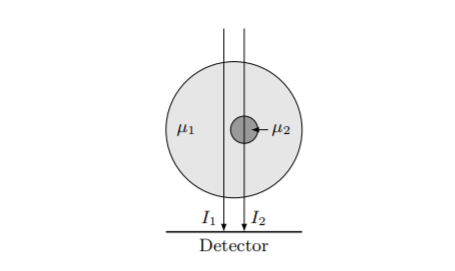

### Problem 2: task 1###

We were given two files with corresponding energies and mass-attenuation coefficients for respectivly tissue and bone. The energies are given in $MeV$, while the mass-attenuation coefficients are given in $cm^{2}\cdot g^{-1}$. In this task we have written code to get the values from the files. We have also calculated the attenuation coefficient $\mu$ by the multiplying the mass-attenuation coefficients from the files with the density, $\rho$ for the materials. The densities where given in the project description. We have then plotted the attenuation coefficients as a function of energy.

In this code block we have written the functions that reads the values from the files and retruns the energies and the attenuation coeffisients.

In [5]:
# The read_file function returns two arrays; one for energy values and one for mass attenuation coeffisients values from a file. 
# The function takes in the filename.
# Then it makes two empty lists which will hold the energies and mass attenuation coeffisients.
# Then the file is opened and each line in the file is read and then the energies and mass attenuation coeffisients are extracted 
# and placed in the respective lists.
# The functions closes the file and returns the lists as arrays. 
def read_file(filename):
    energy_MeV_lst=[]
    mass_att_coeff_lst=[]
    
    # Opens file for reading 
    f=open(filename,'r')
    
    # The for loop reads in one line at the time, strips away excess blank spaces, split the line into to values.
    # The values are then turned into float numbers and appended into the lists. 
    for line in f:
        line.strip()
        line_lst=line.split(', ')
        energy_MeV_lst.append(float(line_lst[0]))
        mass_att_coeff_lst.append(float(line_lst[1]))
    f.close()
    
    energy_keV_lst = np.array(energy_MeV_lst)*(10**3)
    mass_att_coeff_lst = np.array(mass_att_coeff_lst)
    
    return energy_keV_lst, mass_att_coeff_lst


# This functions takes in a filename and a rho value, where rho is the density.
# Then the function calls read_file and stores the arrays given from read_file.
# Then the mu values is calculated by multiplaying the mass attenuation coeffisient list with rho, 
# the density of the given material.
# The function returns two arrays; One with energy values and one with mu values. 
def energy_and_mass_att_coeff_lsts(filename,rho):
    
    energy_lst, mass_att_coeff_lst = read_file(filename)
    att_coeff_lst = mass_att_coeff_lst*rho
    
    return energy_lst, att_coeff_lst

In this codeblock we have defined the densities, called functions and plotted the results for this task.

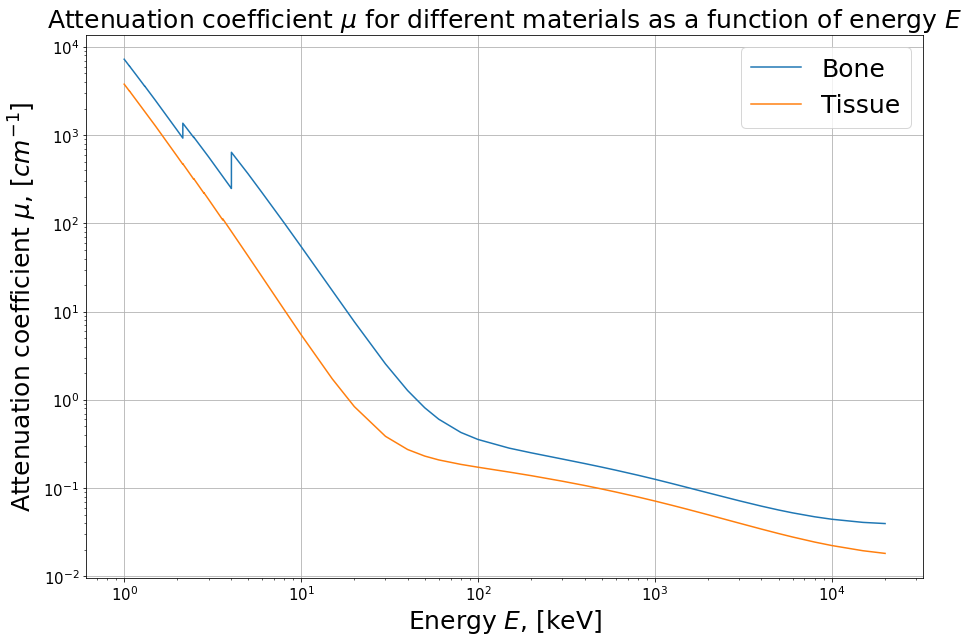

In [6]:
# Here we have defined the rho values (densities) as given in the description of problem 2
rho_bone = 1.92    #[g/cm^3]
rho_tissue = 1.02  #[g/cm^3]


# Here we call on the energy_att_coeff_lsts function both for the file with values for tissue and bone and saves the arrays
energy_bone_lst, mu_bone_lst = energy_and_mass_att_coeff_lsts("bone.txt",rho_bone)
energy_tissue_lst, mu_tissue_lst = energy_and_mass_att_coeff_lsts("tissue.txt",rho_tissue)

# Here we plot the mu values as a function of energy values
# First a figure is made and we spesify the figure size
plt.figure(3, figsize = [15,10])
# Here a title for the plot is set
plt.title(f"Attenuation coefficient $\mu$ for different materials as a function of energy $E$", fontsize=25)
# Here the mu values are plotted as a function of energy for both bone and tissue. The curves is plotted as a loglog plot
plt.loglog(energy_bone_lst, mu_bone_lst,label='Bone')
plt.loglog(energy_tissue_lst, mu_tissue_lst, label='Tissue')


# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel("Attenuation coefficient $\mu$, [$cm^{-1}$]", fontsize=25)
plt.xlabel("Energy $E$, [keV]", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop = {'size':25})
plt.grid()
plt.show()


The plot shows that the attenuation coefficient $\mu$ for bone is greater than the attenuation coefficient $\mu$ for tissue for all energies, which makes sense considering genereal knowledge about the medical X-ray-treatment and Fig. (3) in the project description.

### Problem 2: task 2### 

In this task we were to make adjustments in our code to allow for spatial variations in the attenuation coefficient $\mu$. Here is a short overview of where in the code we have implemented the changes. 
In problem 2 the changes is done to support our special case as shown in figure 1. 
First, in the photons_survived_simulation function, which calculates the number of photons reaching the detector, we implemented that $\mu$ can be a list, where the value of the $\mu$ elements depend on the position $x$. Note that this change does also become useful for Problem 3. In addition, we have defined make_mu_lst which is a function that makes the list of the $\mu$ values dependent on the positions along path 1 and 2 in figure 1. Furthermore, we do all calculations for both path 1 and 2 to take into account that the differences in the spatial variations in $\mu$ along the paths.

### Problem 2: task 3### 

In this task we will calculate the intensities for energies in the range $10keV$ to $100 keV$, and plot the result. This energy range is chosen because this is the normal energy range for X-rays used in medical imaging. We will use the following equation to calculate the intensity, $I$: $ I=NE$. 

In the codeblock below we have defined the functions we need to solve this task. First we have a function find_energy_and_mu_inrange that finds the energies and $\mu$ values in the energy range from the values that we got from the files in problem 2, task 1. Then we have the function make_mu_lst that returns the two lists with $\mu$ values for the two paths, one for path 1 and path 2 in figure 1. Then we have two functions, I_values and I_lsts, which calculate the intensities. I_values calculates the intensities for one specific energy and returns the detected energy. I_lsts calculates the intensities for the different energies by calling I_values. 

In [7]:
# find_energy_mu_inrange is a function that find the energy and coresponding mu values in an given energy range. 
# The function takes in the energy and mu lists for both tissue and bone, togheter with n_step
# and e_min og e_max witch defines the energy intervall of interest.
# In the function, there is made new lists for energy values, and for my values for tissue and bone
# Then the dobble for-loop iterates through the energy lists. If the energy values are in the intervall [e_min,e_max] 
# and are equal for both energy values this energy value is added to the list.
# Then the index of the energy values in the original lists are found for both bone and tissue. 
# The indexes are used to find the corresponding mu values for bone and tissue which is added to the respective lists.
# Then all three lists are returned as arrays. 

def find_energy_and_mu_inrange(energy_bone_lst, mu_bone_lst, energy_tissue_lst, mu_tissue_lst,e_min, e_max,n_step):
    # Make empty lists
    E_lst=[]
    mu_bone_inrange_lst=[]
    mu_tissue_inrange_lst=[]
    
    
    # Dooble for loop
    for eb in energy_bone_lst:
        for et in energy_tissue_lst:
            # If the energy values for tissue and bone is in the intervall and equal to eachother
            if eb==et and eb<=e_max and eb>=e_min:
                E_lst.append(eb)
                # Find indexes to pick out mu values.
                indexb=np.where(energy_bone_lst==eb)
                indext=np.where(energy_tissue_lst==et)
                
                mu_bone_inrange_lst.append(mu_bone_lst[indexb[0][0]])
                mu_tissue_inrange_lst.append(mu_tissue_lst[indext[0][0]])

    return np.array(E_lst),np.array(mu_tissue_inrange_lst),np.array(mu_bone_inrange_lst)


# This function takes in n_step and two mu values; one for tissue and one for bone.
# The function then returns to arrays one for each path as descriped in Fig. (4) in the project description.
# First the array for path 1 is made. This has n_step elements where all has the value mu_tissue
# Then an array with lenght n_step is made for path 2. By the use of a for loop we iterate from 0 to n_step.
# If the iterator j is between 1/3 and 2/3 of n_step, the mu value for bone is added to the list at index j, if not the
# value for tissue is added. 
# Then the arrays with mu values for path 1 and 2 is returned.
def make_mu_lst(n_step, mu_tissue, mu_bone):
    mu_1=np.ones(n_step)*mu_tissue
    mu_2=np.ones(n_step)
    for j in range (n_step):
        if j>(n_step/3) and j<(n_step*2/3):
            mu_2[j]=mu_bone
        else:
            mu_2[j]=mu_tissue
    return mu_1, mu_2


# This function calculates the intersity for path 1 and 2 for one energy value and corresponding arrays of mu values.
# The function takes in the energy value, the two mu lists for each path, n_step, N_0, which is the number 
# of photons we send into the material, and t which is the thickness of the material.
# The detected intensity is then calculated for each of the paths by calling the photons_survived_simulation function with
# the mu array for that path.
# Then the intensity for the path is calculated by taking the number of detected photons multiplied by the energy.
# The detected intensity values for path 1 and 2 is then returned, 
# together with the lists containing survived photons for each step for both paths, where the latter will be used
# in Problem 2: task 6.
def I_values(n_step, N_0, E, mu_1, mu_2, t):

    surviving_1_lst=photons_survived_simulation(int(N_0),n_step,mu_1, t)
    I_1=surviving_1_lst[-1]*E

    surviving_2_lst=photons_survived_simulation(int(N_0),n_step,mu_2, t)
    I_2=surviving_2_lst[-1]*E
        
    return I_1, I_2, surviving_1_lst, surviving_2_lst

# This function calculates the detected intensity for different energy values. 
# The function takes in N_0, the number of photons sent in, either as a list or as a float/int,
# t, the thickness of the material and E_lst which is a array containing energy values.
# First the function checks if N_0 is a float or int. If it is an int of float it is turned into a list.
# Then two empty arrays are made. One for intensity values for path 1 and one for path 2. 
# Both arrays have the same length as the energy list.
# Then by the use of a for-loop, we iterate through the length of the energy list. For each energy in E_lst, we pick out 
# the corresponding mu values for bone and tissue. 
# The arrays containing the mu values are constant global variables and therefore not taken in as parameters in the function.
# Then the corresponding N_0 value is picked out form the list.
# By calling the I_values function with the parameters described below the intensity values for path 1 and 2 for the given 
# energy value is calculated and then appended into the intensity arrays.
# Then the intensity arrays are returned. 
def I_lsts(E_lst,N_0,n_step, t):
    
    # Creates arrays for the intensity values
    I_lst_1=np.zeros(len(E_lst))
    I_lst_2=np.zeros(len(E_lst))
    
    # The for loop that calculates the intensity for each energy value
    for i in trange(len(E_lst)): 
        E=E_lst[i]
        mu_tissue=mu_tissue_inrange_lst[i]
        mu_bone=mu_bone_inrange_lst[i]
        
        mu_1,mu_2=make_mu_lst(n_step,mu_tissue, mu_bone)

        I_1,I_2, surviving_1_lst, surviving_2_lst =I_values(n_step, N_0,E,mu_1,mu_2, t)
        
        I_lst_1[i]=I_1
        I_lst_2[i]=I_2
        
    return I_lst_1,I_lst_2


In this codeblock we have defined constants, called functions and plotted the results. 

100%|██████████| 9/9 [01:11<00:00,  7.94s/it]


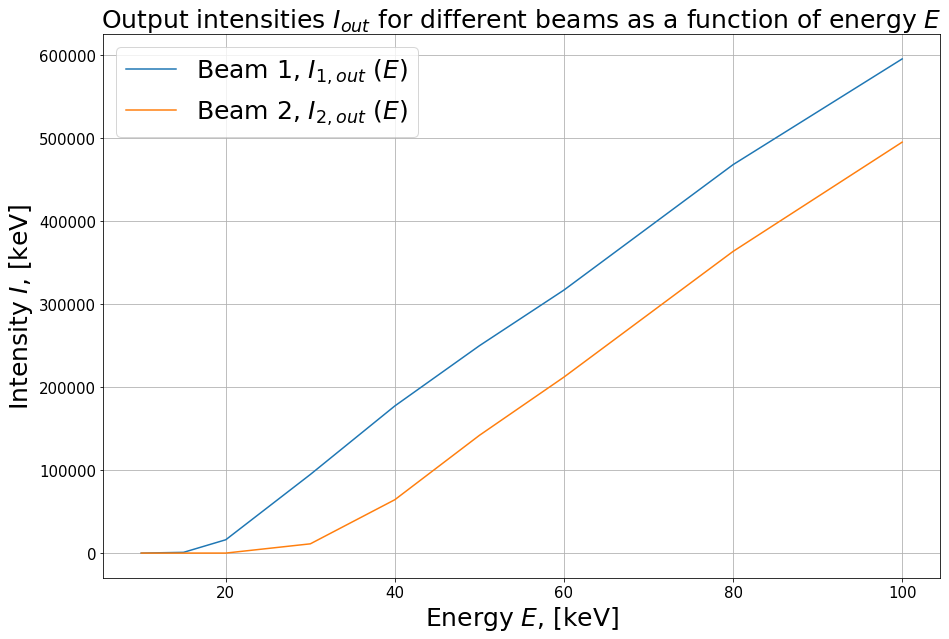

In [8]:
# Here we define variables necessary for this problem. t, e_max and e_min is given in the project description. 
# n_step and N_0 we have defined ourselves.
t= 3           #[cm]
n_step= 1000
N_0= 10000 
e_max= 100     #[keV]
e_min= 10      #[keV]

# Here we call on the necessary functions
E_lst, mu_tissue_inrange_lst, mu_bone_inrange_lst = find_energy_and_mu_inrange(energy_bone_lst, mu_bone_lst, energy_tissue_lst, mu_tissue_lst, e_min, e_max, n_step)

I_lst_1, I_lst_2 = I_lsts(E_lst, N_0, n_step, t)

# Here we plot intensity as a function of energy for path 1 and 2.
# First a figure is made and the figure size set. Then the figur is given a title
plt.figure(4, figsize = [15,10])
plt.title("Output intensities $I_{out}$ for different beams as a function of energy $E$", fontsize=25)

# Here we plot the intenisty for the two paths as a function of energy
plt.plot(E_lst, I_lst_1, label = "Beam 1, $I_{1, out}$ ($E$)")
plt.plot(E_lst, I_lst_2, label = "Beam 2, $I_{2, out}$ ($E$)")

# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel("Intensity $I$, [keV]", fontsize=25)
plt.xlabel("Energy $E$, [keV]", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop = {'size':25})
plt.grid()
plt.show()
    

As expected the output intensity of beam 1, $I_1$ is greater than the output intensity of beam 2, $I_2$ for all energies. Again, this makes sense considering the plot in task one and the equation; $I = NE$. The plot from task 1 tells us that the probability of a photon to be absorbed is higher in the bone than in the tissue. This means that more photons $N$ will be absorbed in beam 2 than in beam 1, and giving a lower output intensity for beam 2 according to the mentioned equation. In addition, it also makes sense considering genereal knowledge about the medical X-ray-treatment and Fig. (3) in the project description.


### Problem 2: task 4###
In this problem we will calculate the contrast for energies in the range 10 keV to 100 keV. We have calculated the contrast from Eq. (5) in the project description.
Due to the fact that we will get that the intensity for path 1 will be zero for the first energy, $10 keV$, we have decided to not calculate and plot the contrast for the first energy. This decision is made because we divide by the intenisty of path 1 in Eq. (5) and dividing by zero is not a valid mathematical calculation. The reason why we get zero intensity is that the attenuation coefficient $\mu$ is so high for this low energy that all of the $N_0= 10000$ photons sent into the material becaomes absorbed. This were discussed at the end of Problem 1: task 4. If the number photons sent into the material was high enough, some photons would have reached the end of the material, and we would have a non-zero intensity. However, we have tested a little, and this number would in that case have to be a lot higher, making the code run a lot slower. We decided it was not worth it, but decided instead to mention why the intensity became zero. 


In the codeblock below we have defined a function that calculates the contrast, called on the function and plottted the results.

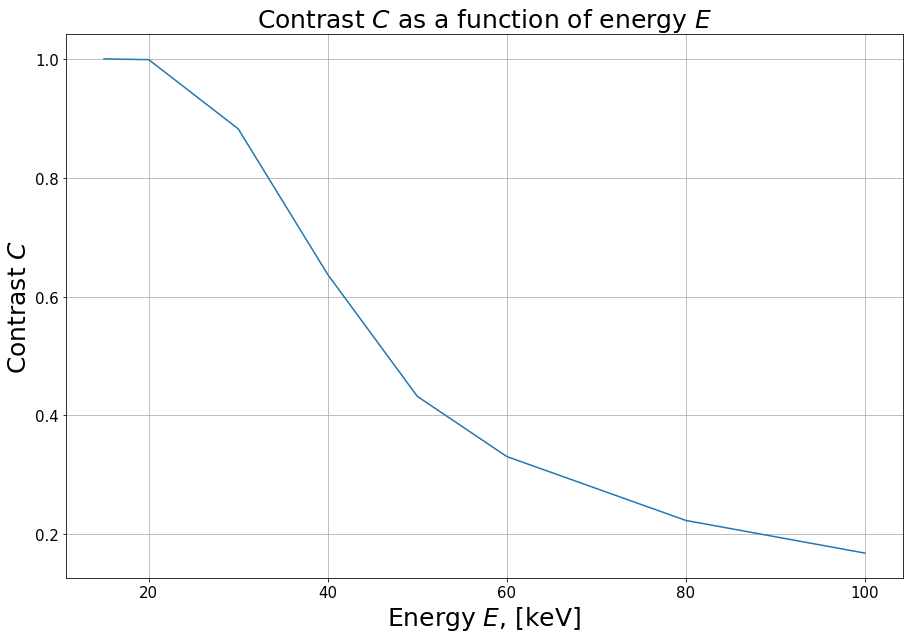

In [9]:
# This function calculates the relative contrast between the intensities as defined in Eq. (5) in the project description.
# The function takes in two arrays that contains the intensities for path 1 and 2.
# The function then returns an array containing the contrast values for each energy. 
# We do not calculate for the first energy because we will then have to divide by zero.

def contrast_func(I_1,I_2):
    C=np.array([])
    
    C=(I_1[1:]-I_2[1:])/(I_1[1:])
    return C


# Here we call on the contrast function
C_lst = contrast_func(I_lst_1,I_lst_2)

# Here we plot the contrast as a function of energy.
# First a figure is made and the figure size set. Then the figur is given a title
plt.figure(5, figsize = [15,10])
plt.title("Contrast $C$ as a function of energy $E$", fontsize=25)

# Here the contrast is plotted as a function of energy
plt.plot(E_lst[1:], C_lst)

# Here we set titles on the axes, and set the size of the numbers on the axes.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel("Contrast $C$", fontsize=25)
plt.xlabel("Energy $E$, [keV]", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()


In the plot above we have plotted the contrast as a function of energy. From the plot we can see we have the best contrast for high energies. We can see that the contrast decrease when the energy increases. 

### Problem 2: task 5###
In this task we will look at how many photons we have to send into the material in order to register an intensity $I_1=10MeV$ from path 1 for different energies in the range 10 keV to 100 keV. We have then calculated the output intensities for the required number of photons and plotted these. We have also plotted the required number of photons. 

In the codeblock below we have defined the function that calculates the requiered number of photons.

In [10]:
# This function calculates the number photons that is requiered to achive a certain detected intensity for path 1 for 
# different energy values. 
# The function takes in n_step, I_1 which is a given constant value, E_lst and t, the material thickness.
# First three arrays with the same length as E_lst are made, one for the number of photons sent inn, 
# and one for detected intensity for each path.
# Two 2D arrays is also made to hold the lists of how many phtotons have survived each step for each energy. One 
# array is made for each path.
# Then there is a for-loop that iterates thorugh the length of the energy list
# For each iteration N_0 is set to one, which means 1 photon, and our test values for intensity is set to zero.
# We then pick out the energy value and the corresponding mu values for tissue and bone.
# Then we call the make_mu_lst function to get the mu lists on the correct form.
# Then a while loop with statements I_test_1<I_1 and N_0<=2.5*10**(5) calculates required photons for each energy.
# The first statement means that our calculated intensity I_test_1 has to be less than the given intensity I_1
# and the second statement says that the maximum number of photons sent into the material is 2.5*10^(5)
# The while loop calculates the intensity by calling the I_values function each time it runs. I_values is called with N_0=1.
# Which means it calculates the intensity when one photon is sent in. Then the calculated intensity is then added to I_test_1.
# Lastly the N_0 value is updated. 
# When the while loop breaks of, because one of the statements become false, the N_0 value, and detected intensities
# are added to the correct arrays.
# The function returns the arrays for required N_0, detected intensities and the 2D arrays for survived photons. 


def requierd_N(n_step, I_1,E_lst, t):
    N_required_in_lst = np.zeros(len(E_lst))
    I_1_out_lst = np.zeros(len(E_lst))
    I_2_out_lst = np.zeros(len(E_lst))
    
    surviving_for_each_E_1_lst = np.zeros((len(E_lst), n_step))
    surviving_for_each_E_2_lst = np.zeros((len(E_lst), n_step))
    
    for i in trange(len(E_lst)):
        N_0=1
        
        I_test_1 = 0
        I_test_2 = 0
        
        E = E_lst[i]
        mu_tissue= mu_tissue_inrange_lst[i]
        mu_bone= mu_bone_inrange_lst[i]
        
        mu_1, mu_2 = make_mu_lst(n_step, mu_tissue, mu_bone)
        
        test = False
        
        while((test==False) and N_0<=2.5*10**(5)):
            
            I_one_photon_1, I_one_photon_2, surviving_1_lst, surviving_2_lst = I_values(n_step, 1, E, mu_1, mu_2, t)

            I_test_1 += I_one_photon_1
            I_test_2 += I_one_photon_2
            
            surviving_for_each_E_1_lst[i] += surviving_1_lst
            surviving_for_each_E_2_lst[i] += surviving_2_lst
            
            
            if(I_test_1>I_1):
                test = True
            else:
                N_0 += 1
            
        N_required_in_lst[i]=N_0
        I_1_out_lst[i]=I_test_1
        I_2_out_lst[i]=I_test_2
        
    return N_required_in_lst, I_1_out_lst, I_2_out_lst, surviving_for_each_E_1_lst, surviving_for_each_E_2_lst


In this codeblock we have defined necessary constants, called the required N function.

In [14]:
# Here we define constants as given in the project description.
I_1=10000  #[keV]
t= 3       #[cm]
n_step = 500

# Here we call the neceessary functions
N_required_in_lst, I_1_out_lst, I_2_out_lst, surviving_for_each_E_1_lst, surviving_for_each_E_2_lst = requierd_N(n_step, I_1, E_lst, t)


100%|██████████| 9/9 [00:48<00:00,  5.41s/it]


In this codeblock we have plotted the required number of photons to reach the given I_1 value. 

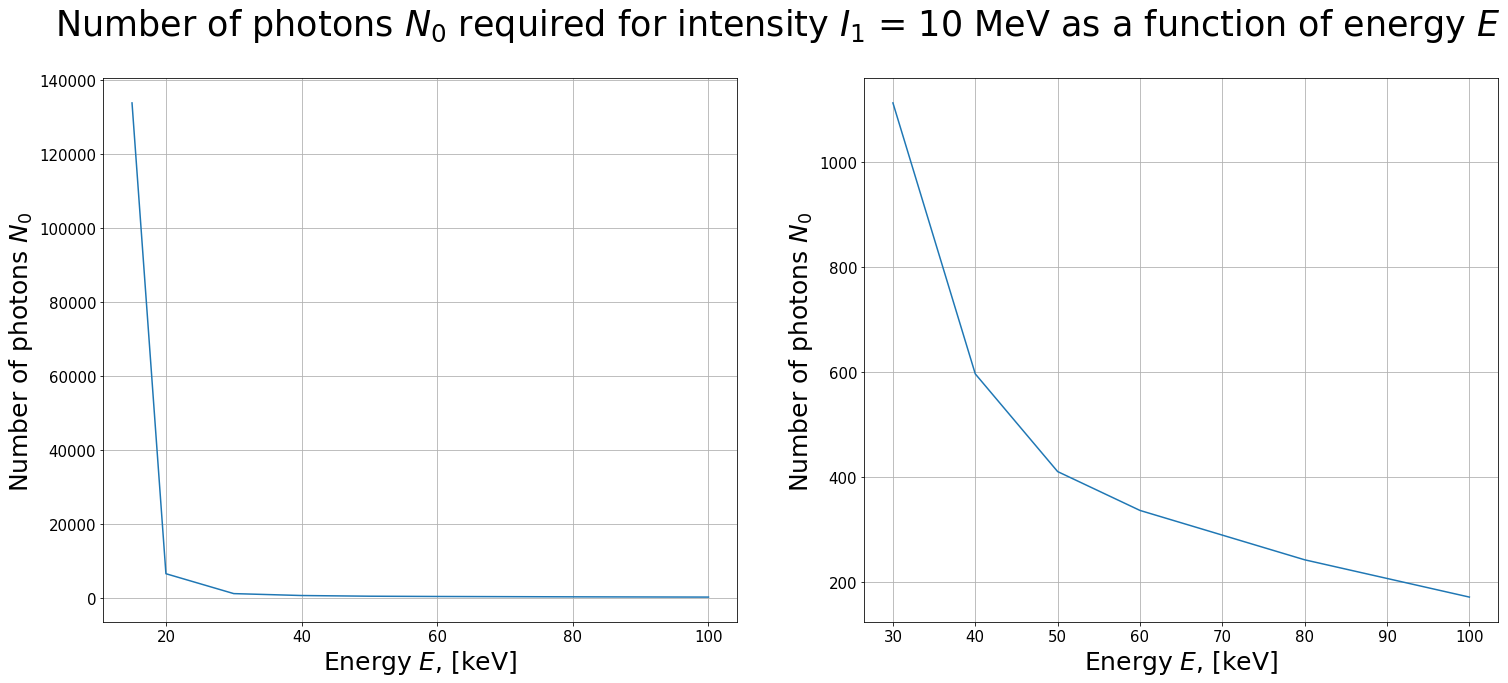

In [15]:
# First we define a figure and that we want 2 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 2 subplots. For each sumbplot, we set a title, plot the number og photons requried to detect
# an intensity of I_1 = 10 MeV = 10 000 keV in as a function of energy E in the two different intervals, 
# set labels to the axes and define the scales on the numbers on the axes. Finally, a show sentence is defined
# to get the notebook to return the subplots as output. 

fig6, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))
fig6.suptitle(f"Number of photons $N_{0}$ required for intensity $I_1$ = 10 MeV as a function of energy $E$", fontsize=35)

#The left plot
ax1.plot(E_lst[1:], N_required_in_lst[1:])
ax1.set_ylabel("Number of photons $N_{0}$ ", fontsize=25)
ax1.set_xlabel("Energy $E$, [keV]", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.grid()

# The right plot
ax2.plot(E_lst[3:], N_required_in_lst[3:])
ax2.set_ylabel("Number of photons $N_{0}$ ", fontsize=25)
ax2.set_xlabel("Energy $E$, [keV]", fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.grid()

plt.show()


Here we have two plots for the required number of photons. The plot to the left is the original plot for all the energies, except for the first energy which is $10 keV$. For this energy the number of photons reaches our set limit which is $2.5*  10^5$ without the intensity for path 1 coming anywhere near $10MeV$. Therefore this will not be the right number of required photons for the energy $10 keV$. We have set this ceiling when it comes to the number of photons to limit the time it takes to run the code, and the size of the limit was chosen from results in task 3. This was done by using the try-and-fail-methos where we tried different numbers of photons sent into the material, $N_0$, and finding what number gave an output intensity for beam one $I_1 = 10MeV$ for all of the energies (exept the first energy which is $10 keV$). Since the number of photons for $10 keV$ calculated with this set limit is wrong, we decided not to plot it. 

In the plot on the right we have plotted the required number of photons for energies from $30 keV$ to $ 100 keV$ to be able to see the changes in this range even better. We made this choice because the required number of photons in the range $10keV$ to $20 keV$ was several orders of magnitude larger than in the $30 keV$ to $ 100 keV$ range, and therefore the results for the $30 keV$ to $ 100 keV$ range was dificult to read from the plot. 

The plots tells us that the number of required photons to register an intensity of $10MeV$ from path 1 decrease with increasing energy. This effects is considerably bigger for energies in the lower range of our intervall than in upper range. 

In this codeblock we have plotted the detected intensities for the required number of photons sent into the material

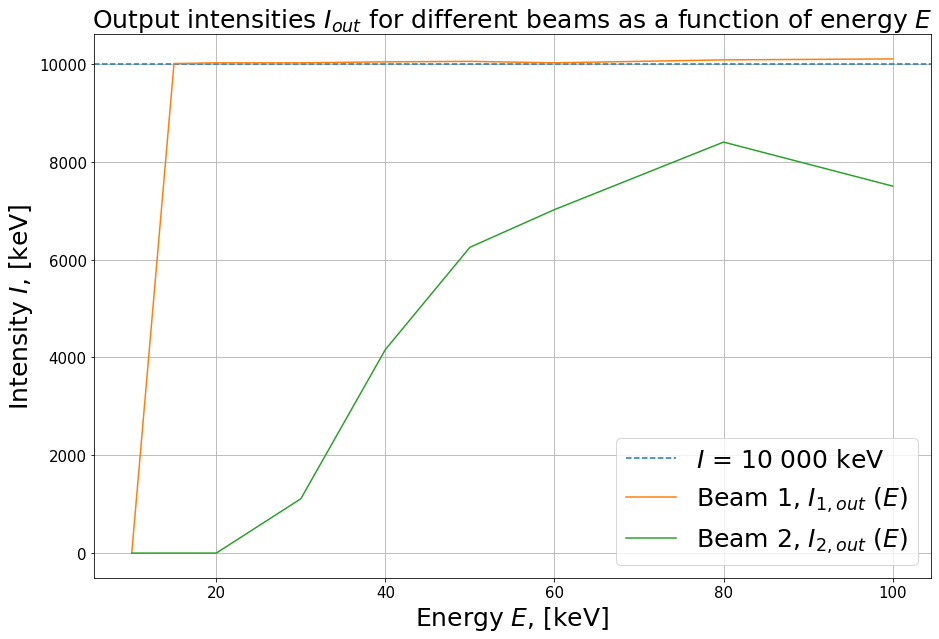

In [16]:
plt.figure(7, figsize = [15,10])
plt.title("Output intensities $I_{out}$ for different beams as a function of energy $E$", fontsize=25)

# Here we first plot the given output intensity I_1=10MeV as a horisontal line
# Then the calculated detected intensities is plotted as functions of energy
plt.axhline(I_1, label = "$I$ = 10 000 keV", linestyle = '--')
plt.plot(E_lst, I_1_out_lst, label = "Beam 1, $I_{1, out}$ ($E$)", color = "C1")
plt.plot(E_lst, I_2_out_lst, label = "Beam 2, $I_{2, out}$ ($E$)", color = "C2")

# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel("Intensity $I$, [keV]", fontsize=25)
plt.xlabel("Energy $E$, [keV]", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop = {'size':25})
plt.grid()
plt.show()

Here the detected intensities for path 1 and 2 are plotted together with our wanted intensity for path 1 of $10 MeV$. The detected intensities where calculated by using the required number of photons as plotted above. Here we can see that the intensity for path 1 starts at around zero for $10 keV$ because the number of photons sent into the material does not equal the real number of photons required. After this, the intensity goes up to $10 MeV$ and stays around this value as expected. 

From the plot we can see that the intensity for path 2 is increasing in the energy range, but below $10 MeV$. A lower intensity for path 2 is expected beacuse the higher attenuation coeffisients for bone compared to tissue.

### Problem 2: task 6###
In this task we will calculate the total dose absorbed from path 1 and 2 combined, and plot the results as a function of energy. The total dose is calculated by using the required number of photons and Eq. (6) in the project description. 

Below we have defined two functions. Each function calculate the absorbed dose for one of the paths, using the required number of photons. 

In [17]:
# This function calculates the absorbed dose of energy for path 1. 
# The function takes in E_lst, A which is the crossection, rho which is the density, 
# N_reqired_in_lst the number of photons sent in, t,the material thickness, and surviving_for_each_E_1_lst, which is a 2D
# array that contains arrays of survived number of photons for each step for each energy for path 1.
# First, the function makes an empty list, D_lst, which will contain the absorbed dose for each energy.
# Then the absorbed dose is calculated for each energy by a for loop.
# In the for loop the the number of absorbed photons are calculated by taking the number of photons sent in 
# and subtract the number of photons detected.
# Then the absorbed dose is calculated by Eq. (6) in the project description and appended into the list.
# Then the D_lst is returned as an array.
def D_1_func(E_lst, N_required_in_lst, surviving_for_each_E_1_lst, A, rho_tissue, t):
    D_lst=np.zeros(len(E_lst))

    for i in range(len(E_lst)):
        N_att = N_required_in_lst[i] - surviving_for_each_E_1_lst[i][-1]
        D_lst[i]=(N_att*E_lst[i]/(A*t*rho_tissue))

    return D_lst  #*1.6*10**(-13) for dosen i enhet J/kg

# This function calculates the absorbed dose of energy for path 2. 
# The function takes in E_lst, A which is the crossection, rho for bone and tissue which is the density for the materials, 
# t, the material thickness, and surviving_for_each_E_1_lst, which is a 2Darray that contains arrays of survived number 
# of photons for each step for each energy for path 2. 
# First, the function makes an empty list, D_lst which will contain the absorbed dose for each energy.
# Second, the indexes for where the bone in path 2 starts and end in the survived_photons lists are found. 
# Then the absorbed dose is calculated for each energy by a for-loop.
# In the for-loop the indexes for where the bone starts and ends are used to find out how many photons is absorbed
# in the tissue and in the bone.
# Then the absorved dose is calculated by Eq. (6) in the project description and appended into the D_lst. 
# Here the absorbed dose for tissue and bone is calculated seperatly and then added. 
# Then the D_lst is returned as an array.

def D_2_func(E_lst, N_required_in_lst, surviving_for_each_E_2_lst, A, rho_tissue, rho_bone, t):
    D_lst=np.zeros(len(E_lst))
    
    index_tissue=int(len(surviving_for_each_E_2_lst[0])*1/t)
    index_bone=int(len(surviving_for_each_E_2_lst[0])*2/t)
    
    for i in range(len(E_lst)):
    
        # Calculates the number of photons absorbed in the tissue and in the bone
        N_att_tissue = N_required_in_lst[i] - surviving_for_each_E_2_lst[i][index_tissue]
        N_att_bone = surviving_for_each_E_2_lst[i][index_tissue] - surviving_for_each_E_2_lst[i][index_bone]
        N_att_tissue += surviving_for_each_E_2_lst[i][index_bone] - surviving_for_each_E_2_lst[i][-1]
        
        # Here the absorbed dose is calculated and appended into the list
        D_lst[i]=(E_lst[i]/A)*(N_att_tissue/(l_tissue*rho_tissue)+N_att_bone/(l_bone*rho_bone))
        
    return D_lst  #*1.6*10**(-13) for dosen i enhet J/kg

In the codeblock below we have defined necessary constants, called on the functions that calculate the dose for the two paths. Then we calculate the total dose and plot the results.

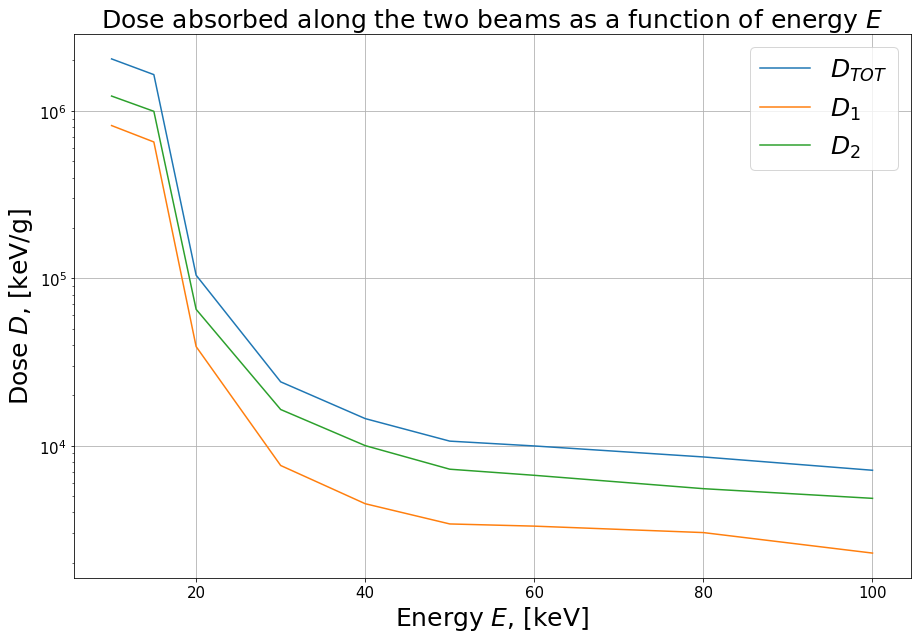

In [18]:
# Here we define necessary constants for this problem. All the constants except A is goven in the project description.
# A we have defined ourselvs
t=3              #[cm]
l_bone=1         #[cm]
l_tissue=2       #[cm]
A=1              #[cm^2]
rho_tissue=1.02  #[g/cm^3]
rho_bone= 1.92   #[g/cm^3]

# Here we call the functions that calculate the absorbed dose for path 1 and 2.
D_1_lst = D_1_func(E_lst, N_required_in_lst, surviving_for_each_E_1_lst, A, rho_tissue, t)
D_2_lst = D_2_func(E_lst, N_required_in_lst, surviving_for_each_E_2_lst, A, rho_tissue, rho_bone, t)

# Here we calculate the total absorbed dose for each energy by adding the dose from path 1 and 2 
D_tot_lst=(D_1_lst+ D_2_lst)

# Here we plot the absorbed dose as a function of energy.
# First a figure is made and the figure size set. Then the figur is given a title
plt.figure(8, figsize = [15,10])
plt.title("Dose absorbed along the two beams as a function of energy $E$", fontsize=25)

# Here we plot the absorbed doses as a function of energy. The doses is plotted as a logarithmic function
plt.semilogy(E_lst,D_tot_lst, label = "$D_{TOT}$")
plt.semilogy(E_lst,D_1_lst, label = "$D_1$")
plt.semilogy(E_lst,D_2_lst, label = "$D_2$")


# Here we set titles on the axes, and set the size of the numbers on the axes.
# We also use plt.legend to get a box in the plot with the name of the curves.
# plt.grid gives a grid in the plot, and plt.show make sure that notebook gives the plot as an output. 
plt.ylabel("Dose $D$, [keV/g]", fontsize=25)
plt.xlabel("Energy $E$, [keV]", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15) 
plt.legend(prop = {'size':25})
plt.grid()
plt.show()

Here we have plotted the doses for both path 1 and 2 together with the total absorbed dose. The doses for path 1 and 2 have similar shapes and the dose for path 1 is lower than the dose for path 2, which is expetcted because of the higher attenuation coeffisients for bone compared to tissue. The total dose is ofcourse higher than the dose for path 1 or 2 alone. The dose value for $10 keV$ is based on a maximum value for photons sent into the material we have set. So the actuall absorbed dose to register an intensity of $10 MeV$ for photons with energy $10 keV$ would be a lot higher. 

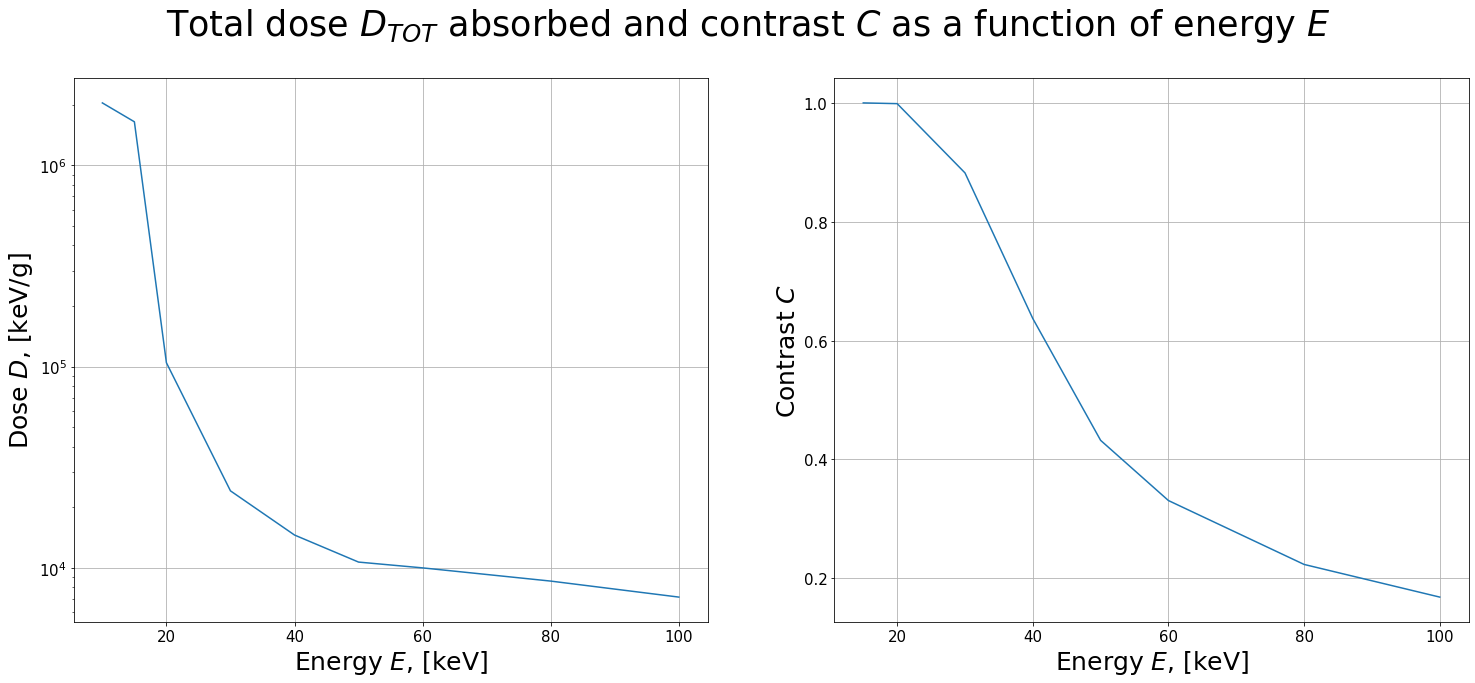

In [19]:

# First we define a figure and that we want 2 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 2 subplots. For each subplot, we set a title, we plot whats of interest, set labels 
# to the axes and define the scales on the numbers on the axes. Finally, a show sentence is defined
# to get the notebook to return the subplots as output. 

fig9, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))
fig9.suptitle("Total dose $D_{TOT}$ absorbed and contrast $C$ as a function of energy $E$", fontsize=35)

# left plot: total dose
ax1.semilogy(E_lst,D_tot_lst)
ax1.set_ylabel("Dose $D$, [keV/g]", fontsize=25)
ax1.set_xlabel("Energy $E$, [keV]", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.grid()

#right plot: contrast
ax2.plot(E_lst[1:],C_lst)
ax2.set_ylabel("Contrast $C$", fontsize=25)
ax2.set_xlabel("Energy $E$, [keV]", fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.grid()

plt.show()

Above we have plotted the absorbed dose and the contrast. We have plotted them in separate plot because the dose is best to plot logarithmic function, while the contrast should not owing to illustrative reasons. The reason we have plotted the contrast again is to better be able to compare it with the dose. 

The purpose of this problem was to find an energy range where one would get a good contrast and also an acceptable absorbed dose. From our results, we have landed on the energy intervall between $30keV$ to $50 keV$. In this intervall the contrast is still quite good while the absorbed dose is quite low. We will get the best contrast for low energies, but here the absorbed dose will also be quite high. Since we do have a limited knowlegde of x-rays and biologi, we can not say what is an aceptable absorbed dose and what is not. Therefore we have said from $30 keV$, although the contrast is a lot better for $ 20 keV$. The problem is that the absorbed dose is over a half order of magnitude higher than for $30 keV$. How much this actually will effect the human body we do not have the knowledgde to say. Since we are insecure about the acceptable dose, we therefore choose to go from $30keV$. To properly draw a conclution about which energy intervall should be used, we would need more knowlegde about the effects of the absorbed dose, versus how much the contrast actually would effect the images. 

### Problem 2: extra###

In [ ]:
def interpolation_of_mu(E, att_coeff_lst, energy_lst):
    index = np.where(energy_lst>E)[0][0]
    numerator = np.log(att_coeff_lst[index]/att_coeff_lst[index-1])
    denominator = np.log(energy_lst[index]/energy_lst[index-1])
    k = numerator/denominator
    mu_interpolated = att_coeff_lst[index-1]*(E/(energy_lst[index-1]))**(k)
    return mu_interpolated



def interpolated_energy_and_mass_att_coeff_lsts(filename,rho, E_lst_i):
    mu = np.zeros(len(E_lst_i))
    
    energy_lst, mass_att_coeff_lst = read_file(filename)
    att_coeff_lst = mass_att_coeff_lst*rho
    
    for i in trange(0, len(E_lst_i)):
        mu[i] = interpolation_of_mu(E_lst_i[i], att_coeff_lst, energy_lst)
    
    return mu


NB! This is NOT a part of our answer! Therefore we have not run this codeblock.

Here we have tried to interploate the the data from the files we were given. We decided not to proceed with this code, due to that the code took a lot longer time to run when the lenght of the energy list, E_lst, got longer. We did try to use numba, but did unfortunately not succeed. 

The function interpolation_of_mu is based on the section "Finding the function from the log–log plot" form the following link: https://en.wikipedia.org/wiki/Log%E2%80%93log_plot. It takes in an wanted energy. The function calcluates and returns the corresponding mu value for the given material for this wanted energy by interpolating. 

The function interpolated_energy_and_mass_att_coeff_lsts takes in a file, reads it, and returns the data, wich here is lists over the energies and theirs corresponding mass attenuation coefficients. Futhermore we calculate the attenuation coefficients, the mu, values. The function does also take in a list of wanted energies. For each of these energies, we find the correspondiong mu values by calling on the function interpolation_of_mu.


## Problem 3##
In this task we will image two unknown 3D figures, based on 3D matrixes with varying attenuation coeffisients, for the different energies given. We will also here assume 1D photon propagation and use the Monte Carlo method calculate the attenuation of photons. The objects will be plotted as 2D objects and we will look at them from three directions. Therefore we will get three plots for a given energy for each object. The objects we will analyse is given as a 3D matrixes in txt-files. 

The function defined below takes in the 3D matrix for the object, and the lenght of the matrix in different directions. And then make 3 2D lists which contains the intensities for the different coordinates. The intensities is calculated by simulating the number of photons that is detected and then multiplying it with the given energy used.

In [20]:
# This function calculates the simulates x_rays through a 3D matrix.
# The function takes in an object which is a 3D matrix containing mu values, N_0 witch is the number of phontons 
# sent into the material, t_x which is the x dimension of the object,
# t_y which is the y-dimension of the object, t_z which is the z-dimension of object and the energy, E.
# First the function calculates the length of the x, y, and z dimension in the 3D array
# then 3 2D arrays are made, where all the elements are zero.
# The first array is for the xy plane, the second array is for the xz plane, and the third array is for the yz plane.
# Then there is three double for loops. Each one fills one of the 2D arrays which correct values.
# The way the for dobble loops are built up are almost identical and therefore only the first one is described in full.
# The difference in the second and third loop is pointed out compared to the first.

# The calculations that are done in the first double loop are
# 
# 1. An array containing the mu values is made by slicing the 3D matrix.
# 2. The photons_survived_simulation function is called with n_step as len_z and t_z as the material thickness.
# 3. The detected number of photons which is the last element in surviving_lst is appended in the 2D list. 
# 4. Step 1 through 3 are then calculated for each x and y in the 3D matrix. 

# In the second for loop len_z is switced out with len_y and t_z with t_y. 
# The slicing in step 1 is different. 
# And in step 4 it is for each z and x.

# In the third for loop len_z is switced out with len_x and t_z with t_x. 
# The slicing in step 1 is different. 
# And in step 4 it is for each y and z.

# Then the values in the 2D arrays are made into values for detected intensities instead of detected photons by multiplying
# each element with the energy.
# The function returns the three 2D arrays with intensity values. 


def photon_survived_3D(object_matrix, N_0, t_x, t_y, t_z, E):
    
    len_x, len_y, len_z = object_matrix.shape
    
    surviving_xy_lst = np.zeros((len_x, len_y))
    surviving_zx_lst= np.zeros((len_z, len_x))
    surviving_yz_lst = np.zeros((len_y, len_z))
    
    for x in trange(len_x):
        for y in range(len_y):
            
            mu=object_matrix[x,y,:]
            surviving_lst=photons_survived_simulation(N_0,len_z, mu, t_z)
            surviving_xy_lst[x,y]=surviving_lst[-1]
            
    for z in trange(len_z):
        for x in range(len_x):
            
            mu=object_matrix[x,:,z]
            surviving_lst=photons_survived_simulation(N_0,len_y, mu, t_y)
            surviving_zx_lst[z,x]=surviving_lst[-1]
            
    for y in trange(len_y):
        for z in range(len_z):

            mu=object_matrix[:,y,z]
            surviving_lst=photons_survived_simulation(N_0,len_x,mu, t_x)
            surviving_yz_lst[y,z]=surviving_lst[-1]
            
    
    I_xy_lst = surviving_xy_lst*E
    I_zx_lst = surviving_zx_lst*E
    I_yz_lst = surviving_yz_lst*E
            
    return I_xy_lst, I_zx_lst, I_yz_lst


### Object 1###

Below we load in the 3D matrixes for the different energies for object 1 and call on the function that simulates the x-rays for the object. Then in the following codeblocks we plot the objects as heatmaps.

In [21]:
# Here we define the number of photons that is sent into the objects
N_0=100

# Here the dimesions of the objects is defined, these were gioven in the project description
t_x_object1 = 6.5   #[cm]
t_y_object1 = 44.6  #[cm]
t_z_object1 = 44.6  #[cm]

# Here we load the 3D matrix containing mu values from a file using the numpys built inn function load.  
object1_20keV = np.load("object1_20keV.npy")
object1_50keV = np.load("object1_50keV.npy")
object1_100keV = np.load("object1_100keV.npy")

E_object1_20keV = 20   #[keV]
E_object1_50keV = 50   #[keV]
E_object1_100keV = 100 #[keV]

# Here we call on the photon_survived_3D for the matrix
I_xy_object1_20keV_matrix, I_zx_object1_20keV_matrix , I_yz_object1_20keV_matrix = photon_survived_3D(object1_20keV, N_0, t_x_object1, t_y_object1, t_z_object1, E_object1_20keV)
I_xy_object1_50keV_matrix, I_zx_object1_50keV_matrix , I_yz_object1_50keV_matrix = photon_survived_3D(object1_50keV, N_0, t_x_object1, t_y_object1, t_z_object1, E_object1_50keV)
I_xy_object1_100keV_matrix, I_zx_object1_100keV_matrix , I_yz_object1_100keV_matrix = photon_survived_3D(object1_100keV, N_0, t_x_object1, t_y_object1, t_z_object1, E_object1_100keV)


100%|██████████| 128/128 [00:25<00:00,  5.01it/s]


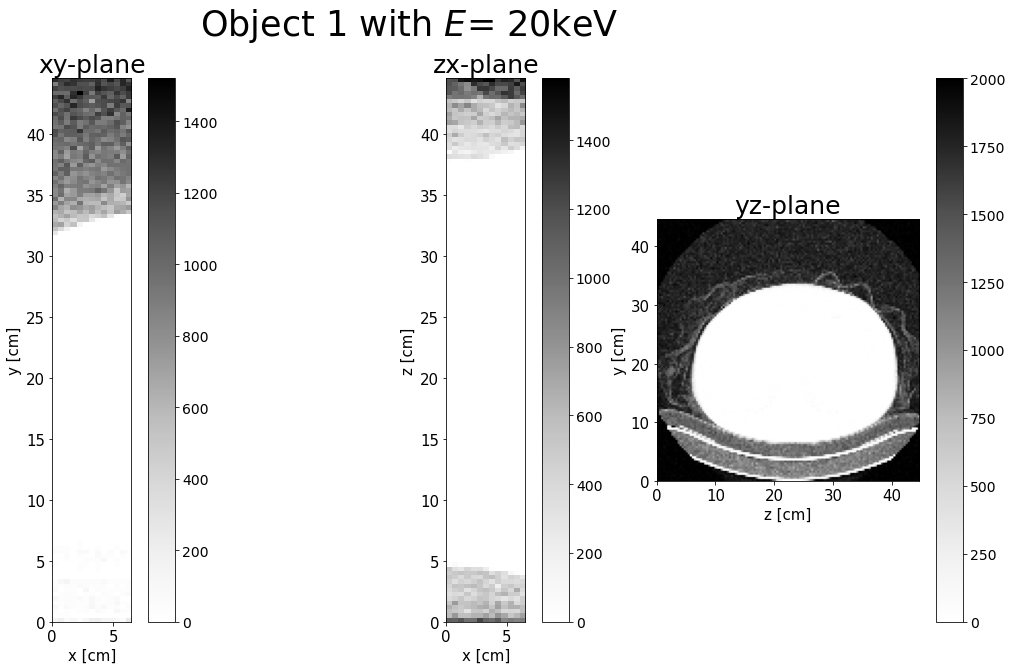

In [22]:
# Here we plot object 1 for 25 keV. We plot the object for the xy, zx and yz planes. 
# First we define a figure and that we want 3 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 3 subplots. For each sumbplot, we set a title, plot the intensities as a heat map, 
# set labels to the axes and define the scales on the axes. Then we add a colorbar to each subplot. 
# When all three subplots are defined there is a show sentence to get notebook to give the plots as output.

fig1, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 10))
fig1.suptitle(f'Object 1 with $E$= 20keV', fontsize=35)


ax1.set_title(f"xy-plane", fontsize=25)
im1=ax1.imshow(np.transpose(I_xy_object1_20keV_matrix), cmap='Greys', extent = [0, t_x_object1, 0, t_y_object1])
ax1.set_ylabel('y [cm]', fontsize=15)
ax1.set_xlabel('x [cm]', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
fig1.colorbar(im1,ax=ax1)


ax2.set_title(f"zx-plane", fontsize=25)
im2=ax2.imshow(I_zx_object1_20keV_matrix, cmap='Greys', extent = [0, t_x_object1, 0, t_z_object1])    
ax2.set_ylabel('z [cm]', fontsize=15)
ax2.set_xlabel('x [cm]', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig1.colorbar(im2,ax=ax2)



ax3.set_title(f"yz-plane", fontsize=25)
im3=ax3.imshow(I_yz_object1_20keV_matrix, cmap='Greys', extent = [0, t_z_object1, 0, t_y_object1])
ax3.set_ylabel('y [cm]', fontsize=15)
ax3.set_xlabel('z [cm]', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
fig1.colorbar(im3,ax=ax3)



plt.show()

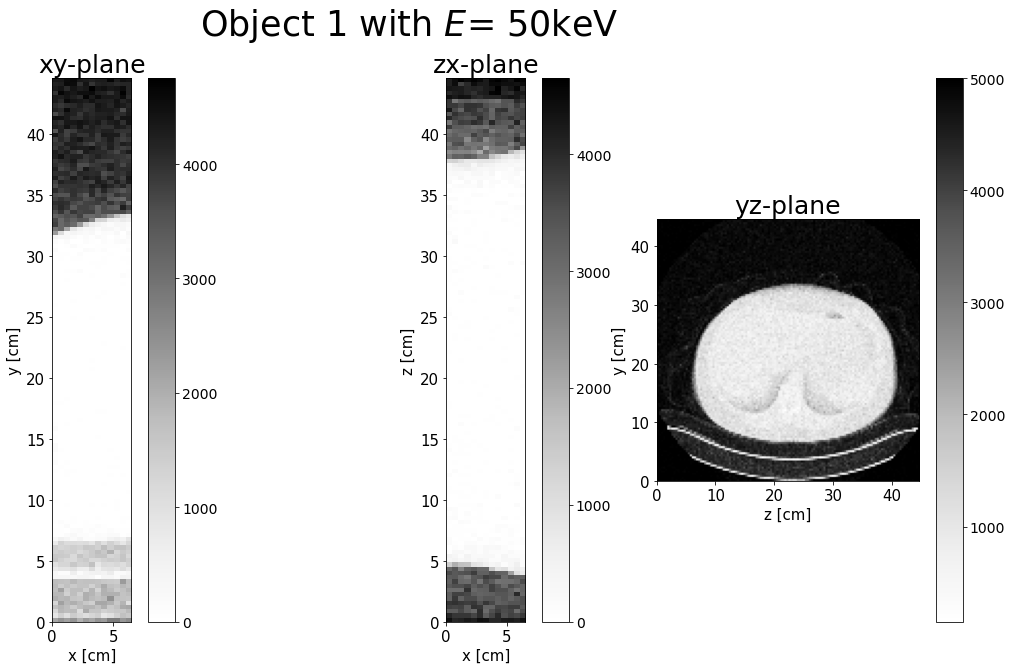

In [23]:
# Here we plot object 1 for 50 keV. We plot the object for the xy, zx and yz planes. 
# First we define a figure and that we want 3 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 3 subplots. For each sumbplot, we set a title, plot the intensities as a heat map, 
# set labels to the axes and define the scales on the axes. Then we add a colorbar to each subplot. 
# When all three subplots are defined there is a show sentence to get notebook to give the plots as output.

fig2, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 10))
fig2.suptitle(f'Object 1 with $E$= 50keV', fontsize=35)


ax1.set_title(f"xy-plane", fontsize=25)
im1=ax1.imshow(np.transpose(I_xy_object1_50keV_matrix), cmap='Greys', extent = [0, t_x_object1, 0, t_y_object1])
ax1.set_ylabel('y [cm]', fontsize=15)
ax1.set_xlabel('x [cm]', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
fig2.colorbar(im1,ax=ax1)

ax2.set_title(f"zx-plane", fontsize=25)
im2=ax2.imshow(I_zx_object1_50keV_matrix, cmap='Greys', extent = [0, t_x_object1, 0, t_z_object1])    
ax2.set_ylabel('z [cm]', fontsize=15)
ax2.set_xlabel('x [cm]', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig2.colorbar(im2,ax=ax2)

ax3.set_title(f"yz-plane", fontsize=25)
im3=ax3.imshow(I_yz_object1_50keV_matrix, cmap='Greys', extent = [0, t_z_object1, 0, t_y_object1])
ax3.set_ylabel('y [cm]', fontsize=15)
ax3.set_xlabel('z [cm]', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
fig2.colorbar(im3,ax=ax3)

plt.show()

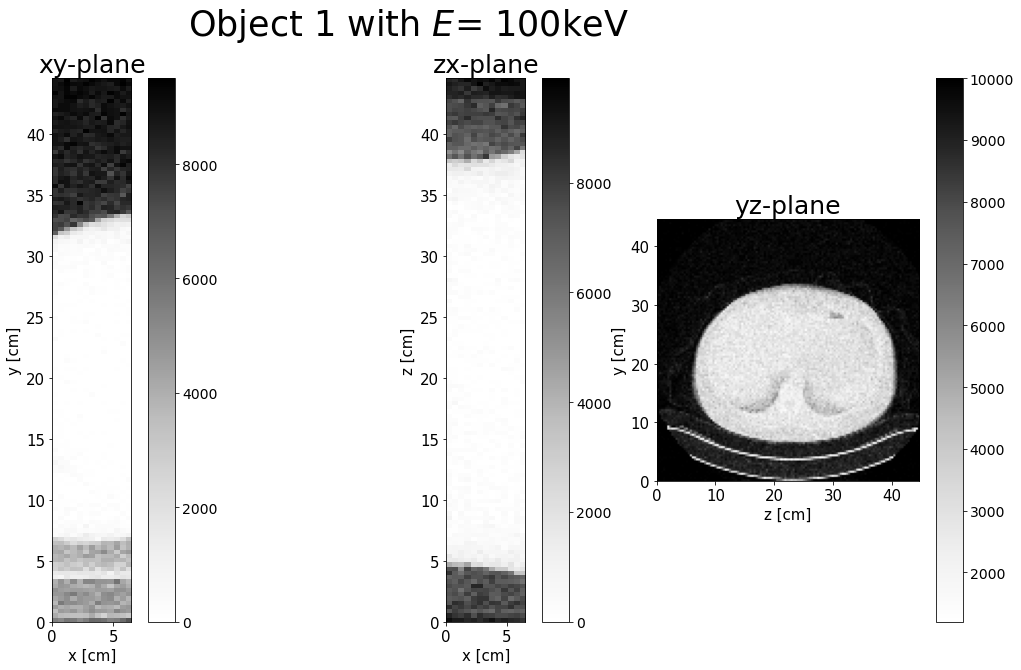

In [24]:
# Here we plot object 1 for 100 keV. We plot the object for the xy, zx and yz planes. 
# First we define a figure and that we want 3 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 3 subplots. For each sumbplot, we set a title, plot the intensities as a heat map, 
# set labels to the axes and define the scales on the axes. Then we add a colorbar to each subplot. 
# When all three subplots are defined there is a show sentence to get notebook to give the plots as output.

fig3, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 10))
fig3.suptitle(f'Object 1 with $E$= 100keV', fontsize=35)


ax1.set_title(f"xy-plane", fontsize=25)
im1=ax1.imshow(np.transpose(I_xy_object1_100keV_matrix), cmap='Greys', extent = [0, t_x_object1, 0, t_y_object1])
ax1.set_ylabel('y [cm]', fontsize=15)
ax1.set_xlabel('x [cm]', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
fig3.colorbar(im1,ax=ax1)

ax2.set_title(f"zx-plane", fontsize=25)
im2=ax2.imshow(I_zx_object1_100keV_matrix, cmap='Greys', extent = [0, t_x_object1, 0, t_z_object1])    
ax2.set_ylabel('z [cm]', fontsize=15)
ax2.set_xlabel('x [cm]', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig3.colorbar(im2,ax=ax2)

ax3.set_title(f"yz-plane", fontsize=25)
im3=ax3.imshow(I_yz_object1_100keV_matrix, cmap='Greys', extent = [0, t_z_object1, 0, t_y_object1])
ax3.set_ylabel('y [cm]', fontsize=15)
ax3.set_xlabel('z [cm]', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
fig3.colorbar(im3,ax=ax3)

plt.show()

From the plots we have identified the object 1 as a knee. Which energy one would use here, depends on what one would like to know. In the first plot for $20 keV$ we can see some of what is going on around the sentral kneecap, but not much of the kneecap itself. So if one wanted to look at the tissue surrounding the knee, $20 keV$ would be a good energy. 
To look at the kneecap itself one would need to use $50 keV$ or $100 keV$.
The differences between the plots $50 keV$ and $100 keV$ is minimal, but the contrast for $100 keV$ is a little better. Given that the absorbed dose would be a lot higher for $100 keV$ than for $50 keV$, since we send in the same number of photons, we conclude that it is better to use $50 keV$.
If this were a medical X-ray scan, one would study the bone instead of the tissue, and therefore the energy $50 keV$ would be suitable.

### Object 2###

Below we load in the 3D matrixes for the different energies for object 2 and call on the function that simulates the x-rays for the object. Then we plot the objects as heatmaps.

In [25]:
N_0=100

t_x_object2 = 12   #[cm]
t_y_object2 = 12   #[cm]
t_z_object2 = 10   #[cm]

# Here we load the 3D matrix containing mu values from a file using the numpys built inn function load.  
object2_25keV = np.load("object2_25keV.npy")
object2_50keV = np.load("object2_50keV.npy")
object2_75keV = np.load("object2_75keV.npy")

E_object2_25keV = 25  #[keV]
E_object2_50keV = 50  #[keV]
E_object2_75keV = 75  #[keV]


# Here we call on the photon_survived_3D for the matrix
I_xy_object2_25keV_matrix, I_zx_object2_25keV_matrix , I_yz_object2_25keV_matrix = photon_survived_3D(object2_25keV, N_0, t_x_object2, t_y_object2, t_z_object2, E_object2_25keV)
I_xy_object2_50keV_matrix, I_zx_object2_50keV_matrix , I_yz_object2_50keV_matrix = photon_survived_3D(object2_50keV, N_0, t_x_object2, t_y_object2, t_z_object2, E_object2_50keV)
I_xy_object2_75keV_matrix, I_zx_object2_75keV_matrix , I_yz_object2_75keV_matrix = photon_survived_3D(object2_75keV, N_0, t_x_object2, t_y_object2, t_z_object2, E_object2_75keV)

100%|██████████| 60/60 [00:14<00:00,  4.28it/s]


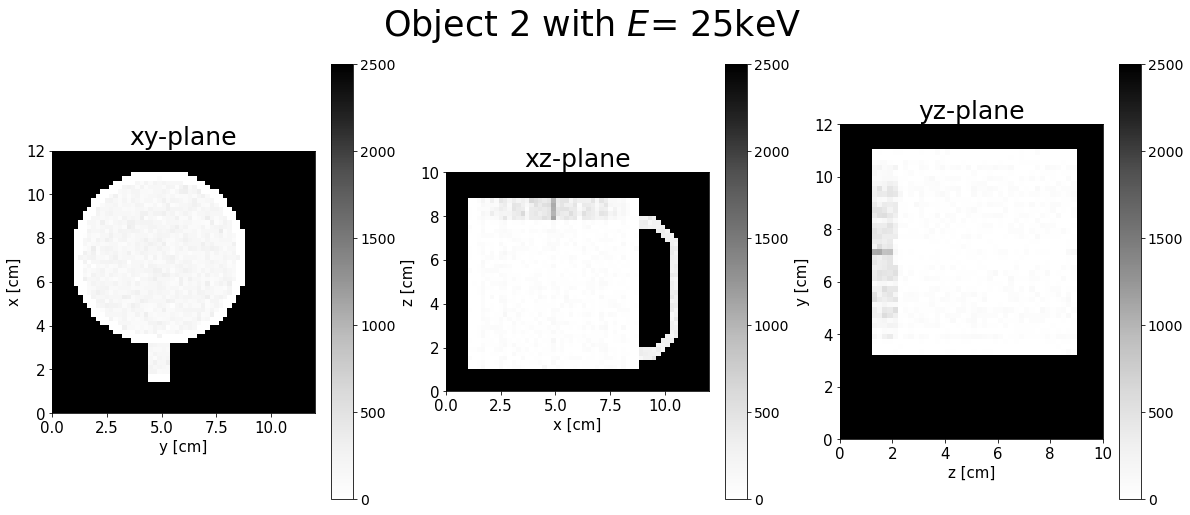

In [26]:
# Here we plot object 2 for 25 keV. We plot the object for the xy, xz and yz planes. 
# First we define a figure and that we want 3 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 3 subplots. For each sumbplot, we set a title, plot the intensities as a heat map, 
# set labels to the axes and define the scales on the axes. Then we add a colorbar to each subplot. 
# When all three subplots are defined there is a show sentence to get notebook to give the plots as output.

fig4, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))
fig4.suptitle(f'Object 2 with $E$= 25keV', fontsize=35)


ax1.set_title(f"xy-plane", fontsize=25)
im1=ax1.imshow(I_xy_object2_25keV_matrix, cmap='Greys', extent = [0, t_y_object2, 0, t_x_object2])
ax1.set_ylabel('x [cm]', fontsize=15)
ax1.set_xlabel('y [cm]', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
fig4.colorbar(im1,ax=ax1)


ax2.set_title(f"xz-plane", fontsize=25)
im2=ax2.imshow(I_zx_object2_25keV_matrix, cmap='Greys', extent = [0, t_x_object2, 0, t_z_object2])    
ax2.set_ylabel('z [cm]', fontsize=15)
ax2.set_xlabel('x [cm]', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig4.colorbar(im2,ax=ax2)

ax3.set_title(f"yz-plane", fontsize=25)
im3=ax3.imshow(I_yz_object2_25keV_matrix, cmap='Greys', extent = [0, t_z_object2, 0, t_y_object2])
ax3.set_ylabel('y [cm]', fontsize=15)
ax3.set_xlabel('z [cm]', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
fig4.colorbar(im3,ax=ax3)

plt.show()

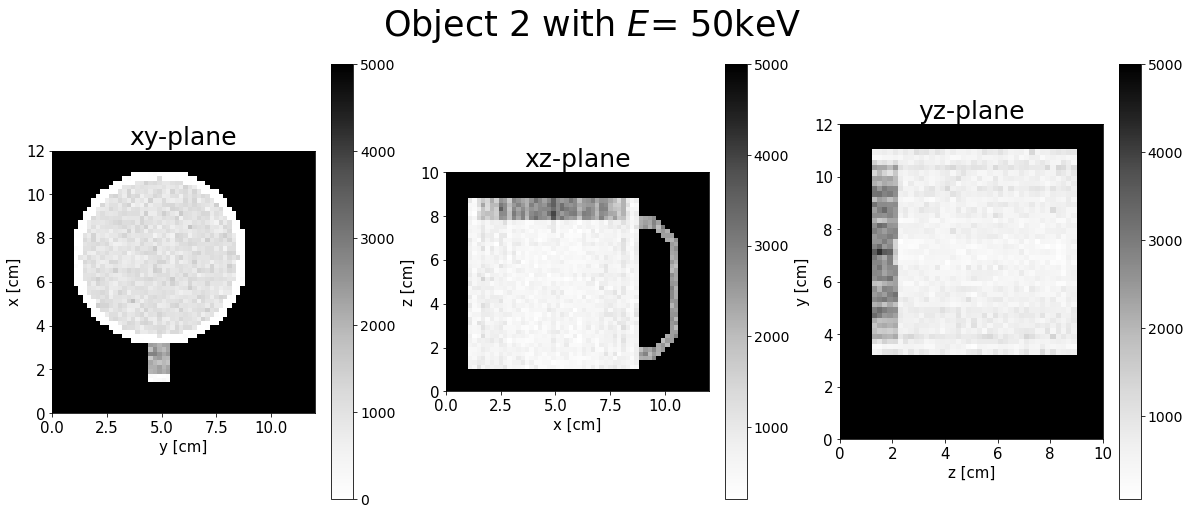

In [27]:
# Here we plot object 2 for 50 keV. We plot the object for the xy, xz and yz planes. 
# First we define a figure and that we want 3 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 3 subplots. For each sumbplot, we set a title, plot the intensities as a heat map, 
# set labels to the axes and define the scales on the axes. Then we add a colorbar to each subplot. 
# When all three subplots are defined there is a show sentence to get notebook to give the plots as output.

fig5, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))
fig5.suptitle(f'Object 2 with $E$= 50keV', fontsize=35)


ax1.set_title(f"xy-plane", fontsize=25)
im1=ax1.imshow(I_xy_object2_50keV_matrix, cmap='Greys', extent = [0, t_y_object2, 0, t_x_object2])
ax1.set_ylabel('x [cm]', fontsize=15)
ax1.set_xlabel('y [cm]', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
fig5.colorbar(im1,ax=ax1)

ax2.set_title(f"xz-plane", fontsize=25)
im2=ax2.imshow(I_zx_object2_50keV_matrix, cmap='Greys', extent = [0, t_x_object2, 0, t_z_object2])    
ax2.set_ylabel('z [cm]', fontsize=15)
ax2.set_xlabel('x [cm]', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig5.colorbar(im2,ax=ax2)

ax3.set_title(f"yz-plane", fontsize=25)
im3=ax3.imshow(I_yz_object2_50keV_matrix, cmap='Greys', extent = [0, t_z_object2, 0, t_y_object2])
ax3.set_ylabel('y [cm]', fontsize=15)
ax3.set_xlabel('z [cm]', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
fig5.colorbar(im3,ax=ax3)

plt.show()


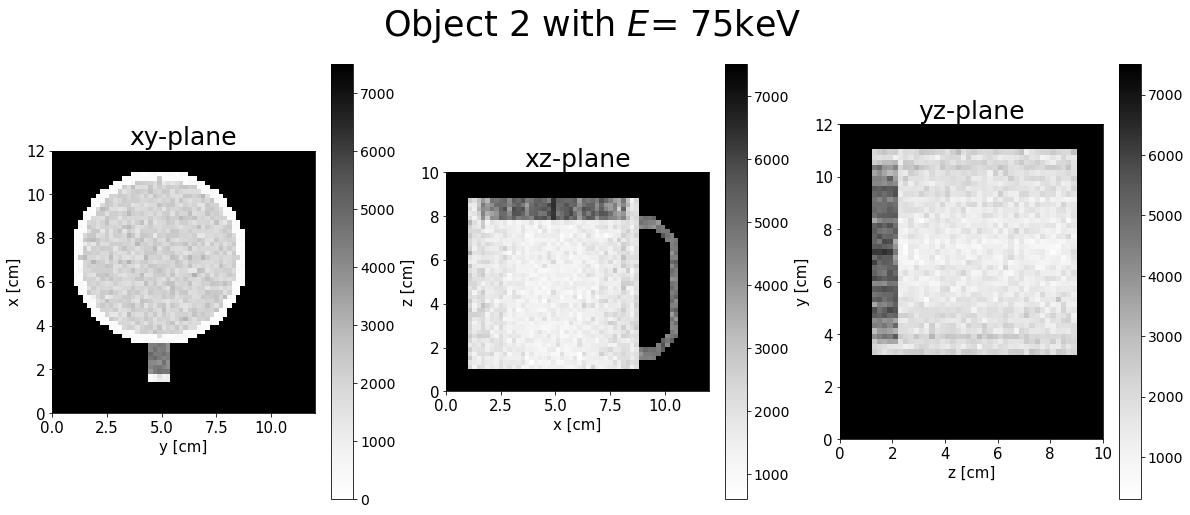

In [28]:
# Here we plot object 2 for 75 keV. We plot the object for the xy, xz and yz planes. 
# First we define a figure and that we want 3 horizontal subplots.
# Then we set a title for the plot. 
# Then define the 3 subplots. For each sumbplot, we set a title, plot the intensities as a heat map, 
# set labels to the axes and define the scales on the axes. Then we add a colorbar to each subplot. 
# When all three subplots are defined there is a show sentence to get notebook to give the plots as output.

fig6, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))
fig6.suptitle(f'Object 2 with $E$= 75keV', fontsize=35)


ax1.set_title(f"xy-plane", fontsize=25)
im1=ax1.imshow(I_xy_object2_75keV_matrix, cmap='Greys', extent = [0, t_y_object2, 0, t_x_object2])
ax1.set_ylabel('x [cm]', fontsize=15)
ax1.set_xlabel('y [cm]', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
fig6.colorbar(im1,ax=ax1)

ax2.set_title(f"xz-plane", fontsize=25)
im2=ax2.imshow(I_zx_object2_75keV_matrix, cmap='Greys', extent = [0, t_x_object2, 0, t_z_object2])    
ax2.set_ylabel('z [cm]', fontsize=15)
ax2.set_xlabel('x [cm]', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig6.colorbar(im2,ax=ax2)

ax3.set_title(f"yz-plane", fontsize=25)
im3=ax3.imshow(I_yz_object2_75keV_matrix, cmap='Greys', extent = [0, t_z_object2, 0, t_y_object2])
ax3.set_ylabel('y [cm]', fontsize=15)
ax3.set_xlabel('z [cm]', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
fig6.colorbar(im3,ax=ax3)

plt.show()

From the plots we have identified object 2 as a mug. We can see that we get better images for increasing energies. Assumning that there is no health or safety considerations that has to be taken here when choosing the energy, we would choose $75 keV$ to image this object. If there were to be any other reasons why we want to limit the energy used, the energy $50 keV$ is also a good alternative due to that this energy does also give a good image of the object.

Note that for all of the plots in  Problem 3, the directions of the axis and the location of origo does NOT correspond to the the dimensions in the given 3D matrix. For example the origo to the matrix could be in the top right corner in the plots, instead of in the lower left as plotted. The reason why we have orgio and axis in the plot is just to get a sense of the lenght in the image. 

## Conclusion ##

In this project we have studied X-rays, their different associated imaging conditions, and how different materials absorb photons and how this affects imaging.

From our calculations in Problem two, we would conclude that an energy interval between $30keV$ to $50 keV$ will give a fairly good contrast but still a limited aborbed dose. However, we do not have a any medical knowledge about what a good contrast is or what a high dose is. Therefore, other energies outside this interval should not be rejected based on our conclusion. 

In problem 3 we imaged two unkown object, where we concluded that the first object was a kneecap. Here we concuded that $50keV$ would be a good energy to use to image this kneecap, because we got a relative good constrast without having to absorb an unnecessarily high dose. We identified the second object to be a bomb inside of a suitcase, and that a good energy would be $50keV$ or $75keV$, depending on potential unknown safety concerns.



